# MILESTONE 4: LINEAR PROBLEMS. REGIONS OF ABSOLUTE STABILITY

Ahora se integrará el oscilador lineal $\ddot{x}+x=0$, con las condiones iniciales de $x(0)$ =1; $\dot{x}(0)=0$

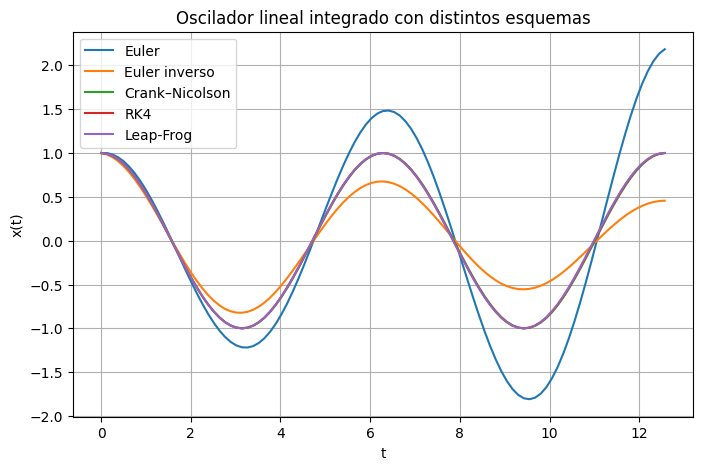

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from temporal_schemes_v2 import (step_euler, step_inverse_euler, step_crank_nicholson, step_rk4, Leap_Frog)

def f_oscilador (U, t):
    x, v =U
    return np.array([v, -x])

def integrate(temporal_scheme, F, U0, T, N):

    dt=T/N
    t = np.linspace(0, T, N+1)
    U = np.zeros((N+1, len(U0)))
    U[0,:]=U0

  

    for n in range(N):
 
     U[n+1, :] = temporal_scheme(F, U[n,:], t[n], dt)

    return t, U



U0 = np.array([1, 0])
T = 4*np.pi
N = 100

t_eu,  U_eu  = integrate(step_euler, f_oscilador, U0, T, N)
t_ie,  U_ie  = integrate(step_inverse_euler, f_oscilador, U0, T, N)
t_cn,  U_cn  = integrate(step_crank_nicholson, f_oscilador, U0, T, N)
t_rk4, U_rk4 = integrate(step_rk4, f_oscilador, U0, T, N)
t_lp, U_lp = integrate(Leap_Frog, f_oscilador, U0, T, N)



plt.figure(figsize=(8,5))
plt.plot(t_eu,  U_eu[:,0],  label="Euler")
plt.plot(t_ie,  U_ie[:,0],  label="Euler inverso")
plt.plot(t_cn,  U_cn[:,0],  label="Crank–Nicolson")
plt.plot(t_rk4, U_rk4[:,0], label="RK4")
plt.plot(t_lp, U_lp[:,0], label = "Leap-Frog")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Oscilador lineal integrado con distintos esquemas")
plt.legend()
plt.grid(True)
plt.show()


## REGIONES DE ESTABILIDAD


\begin{array}{c|c}
\textbf{Método} & \Pi(r,\omega) = 0 \\[6pt]
\hline
\text{Euler explícito} &
\Pi(r,\omega)= r - (1+\omega) \\[6pt]
\text{Euler inverso} &
\Pi(r,\omega)= (1-\omega)r - 1 \\[6pt]
\text{Crank--Nicolson} &
\Pi(r,\omega)= \left(1-\frac{\omega}{2}\right)r - \left(1+\frac{\omega}{2}\right) \\[6pt]
\text{RK4} &
\Pi(r,\omega)= r - \left(1+\omega + \frac{\omega^2}{2} + \frac{\omega^3}{6} + \frac{\omega^4}{24}\right) \\[12pt]
\text{Leap--Frog} &
\Pi(r,\omega)= r^2 - 2\omega r -1
\end{array}



In [35]:
def r_euler(omega):
    return 1 + omega

def r_euler_inv(omega):
    return 1 / (1 - omega)

def r_CN(omega):
    return (1 + 0.5*omega) / (1 - 0.5*omega)

def r_RK4(omega):
    return 1 + omega + omega**2/2 + omega**3/6 + omega**4/24

def r_lf(omega):
    r1 = (2*omega+np.sqrt(4*omega**2+4))/2
    r2 = (2*omega-np.sqrt(4*omega**2+4))/2
    return r1, r2

### Ahora calculamos las regiones de estabilidad

In [36]:
Re = np.linspace(-4, 4, 800)      # eje real
Im = np.linspace(-4, 4, 800)      # eje imaginario
Re, Im = np.meshgrid(Re, Im)
omega = Re + 1j*Im

stab_eu = np.abs(r_euler(omega)) <= 1
stab_ie = np.abs(r_euler_inv(omega)) <= 1
stab_CN = np.abs(r_CN(omega)) <= 1
stab_RK4 = np.abs(r_RK4(omega)) <= 1

r1_lp, r2_lp = r_lf(omega)
stab_LF = (np.abs(r1_lp) <= 1) & (np.abs(r2_lp) <= 1)



### Representamos las regiones de estabilidad en el plano $\omega$

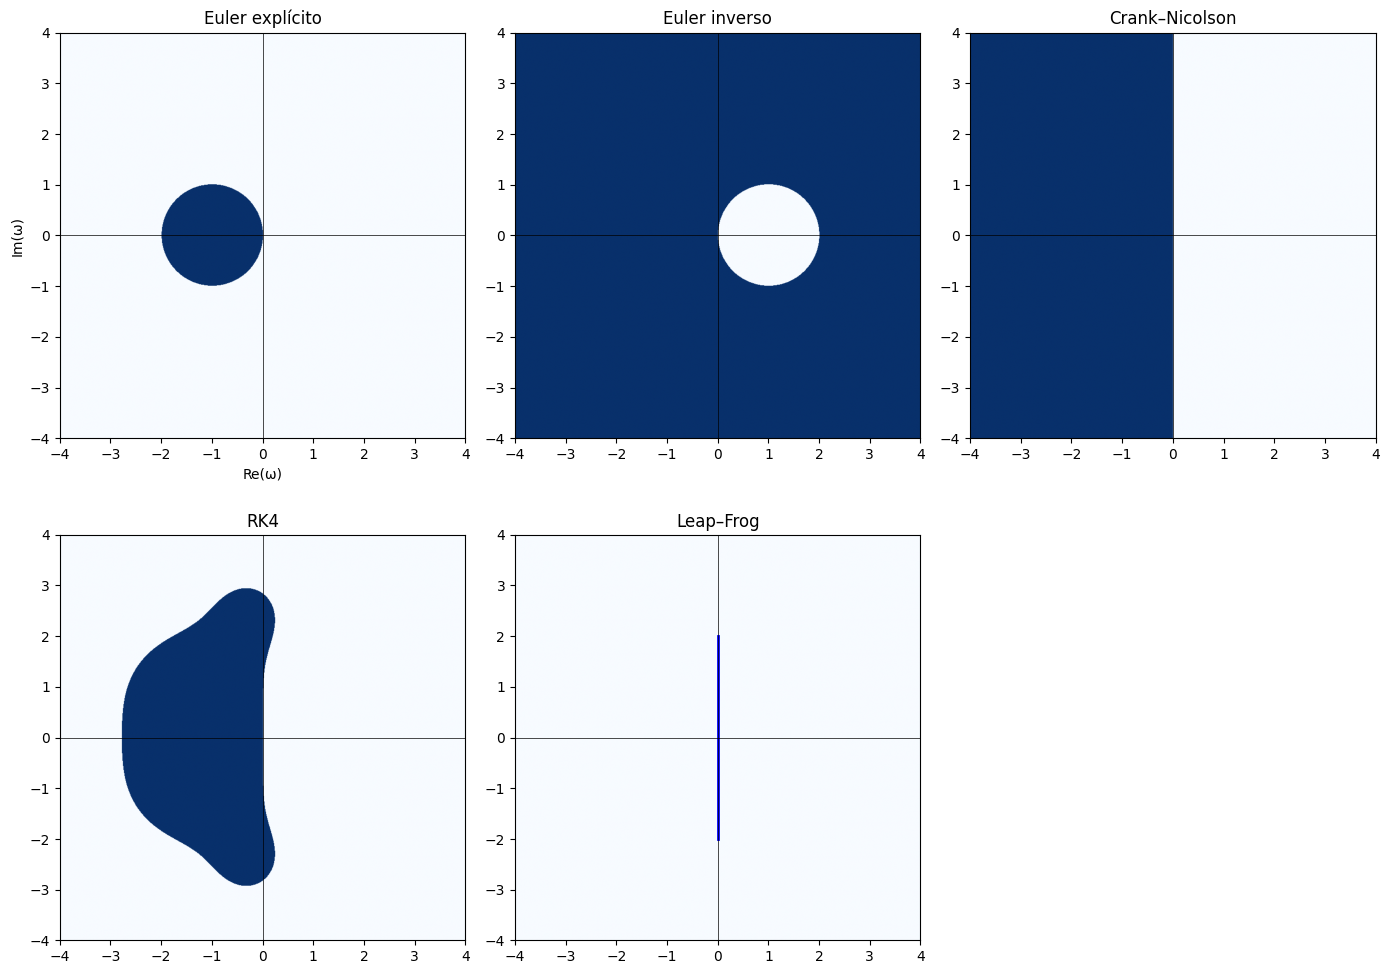

In [45]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14,10))



plt.subplot(231)
plt.imshow(stab_eu, extent=[-4,4,-4,4], origin='lower', cmap='Blues')
plt.title("Euler explícito")
plt.xlabel("Re(ω)")
plt.ylabel("Im(ω)")

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.subplot(232)
plt.imshow(stab_ie, extent=[-4,4,-4,4], origin='lower', cmap='Blues')
plt.title("Euler inverso")

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.subplot(233)
plt.imshow(stab_CN, extent=[-4,4,-4,4], origin='lower', cmap='Blues')
plt.title("Crank–Nicolson")

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.subplot(234)
plt.imshow(stab_RK4, extent=[-4,4,-4,4], origin='lower', cmap='Blues')
plt.title("RK4")

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.subplot(235)
plt.imshow(stab_LF, extent=[-4,4,-4,4], origin='lower', cmap='Blues')
plt.title("Leap–Frog")

# Representamos la región de estabilidad en LF:

plt.plot([0,0], [-2,2], 'b-', linewidth=2, label="Frontera |ω|=2")


plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

